# Fake News Classification

In [1]:
# import libraries
from datasets import load_amazon_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import sys
from wordcloud import WordCloud

/home/dqmis/projects/nlp-classification/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sys.path.append("../../")

from src.data import processing

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Loading Amazon Review dataset and selecting train split

dataset = load_amazon_dataset("GonzaloA/fake_news")
dataset["train"]

Extracting data files: 100%|██████████| 3/3 [00:00<00:00, 1088.96it/s]


Dataset parquet downloaded and prepared to /home/dqmis/.cache/huggingface/datasets/GonzaloA___parquet/GonzaloA--fake_news-1fe2b42e1fa111c8/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 477.10it/s]


Dataset({
    features: ['Unnamed: 0', 'title', 'text', 'label'],
    num_rows: 24353
})

In [5]:
# Converting dataset to pandas dataframe

dataset_df = pd.DataFrame(dataset["train"])

In [6]:
dataset_df.head()

,Unnamed: 0,title,text,label
0,0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0
1,1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0
2,2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1
3,3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0
4,4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0


In [7]:
dataset_df.drop(columns=["Unnamed: 0", "title"], inplace=True)

In [8]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24353 non-null  object
 1   label   24353 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 380.6+ KB


In [9]:
 dataset_df.groupby("label").count().reset_index()

,label,text
0,0,11158
1,1,13195


Text(0.5, 1.0, 'Number of samples of each class')

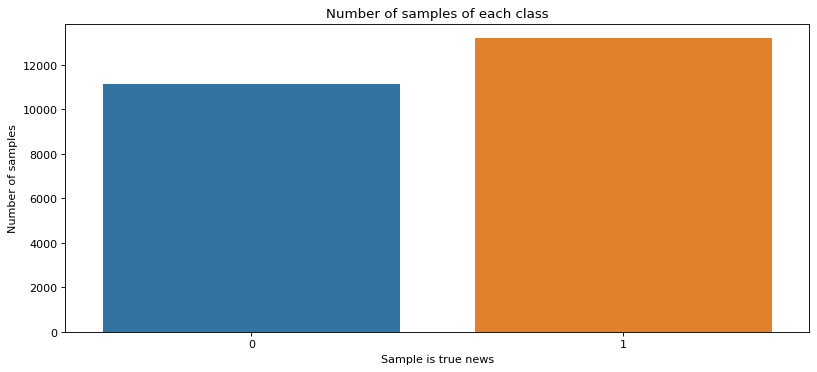

In [11]:
plt.figure(figsize=(12, 5), dpi=80)
sns.countplot(x="label", data=dataset_df)
plt.xlabel("Sample is true news")
plt.ylabel("Number of samples")
plt.title("Number of samples of each class")

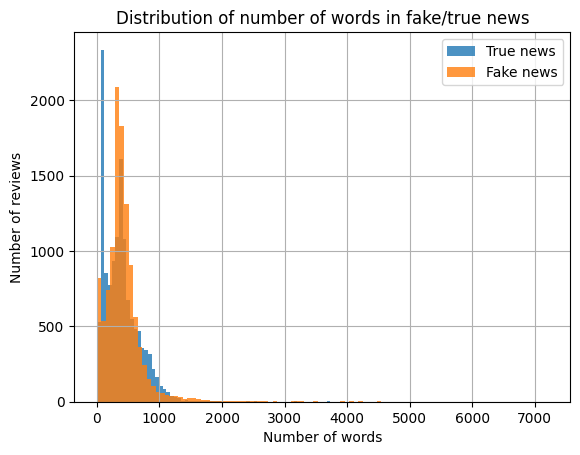

In [22]:
# Get the distribution of number of words in different classes

dataset_df.loc[dataset_df["label"] == 1]["text"].apply(lambda x: len(x.split())).hist(bins=100, label="True news", alpha=0.8)
dataset_df.loc[dataset_df["label"] == 0]["text"].apply(lambda x: len(x.split())).hist(bins=100, label="Fake news", alpha=0.8)
plt.title("Distribution of number of words in fake/true news")
plt.xlabel("Number of words")
plt.ylabel("Number of reviews")
plt.legend()

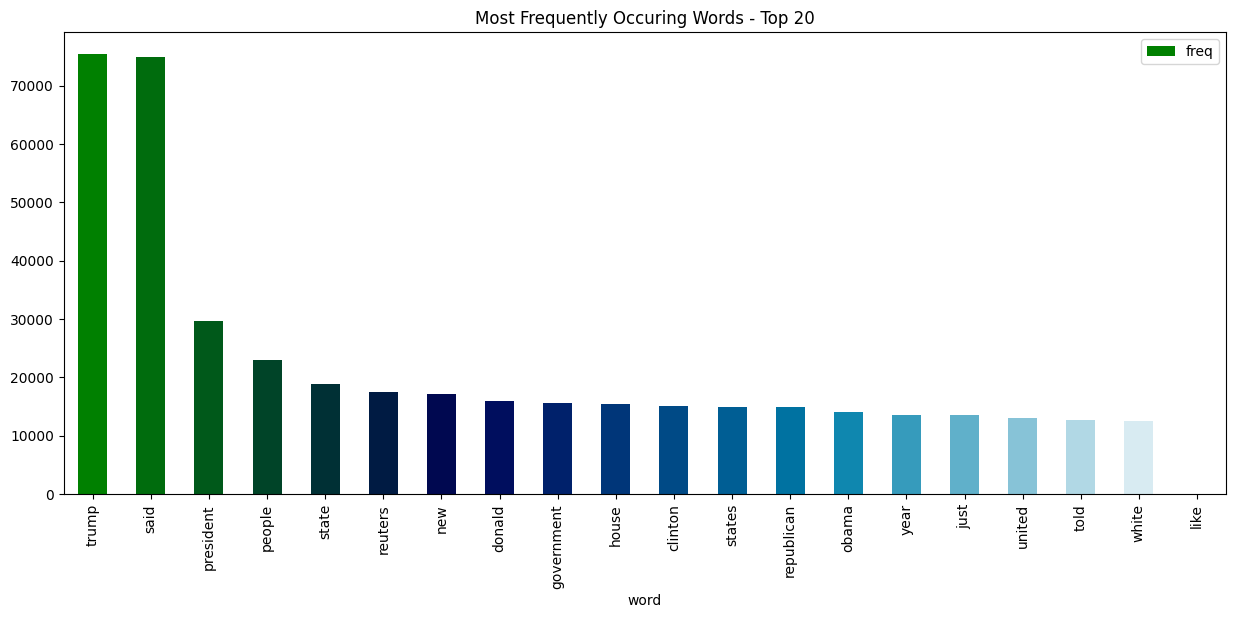

In [23]:
# Get distribution of unique words in text

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_df["text"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

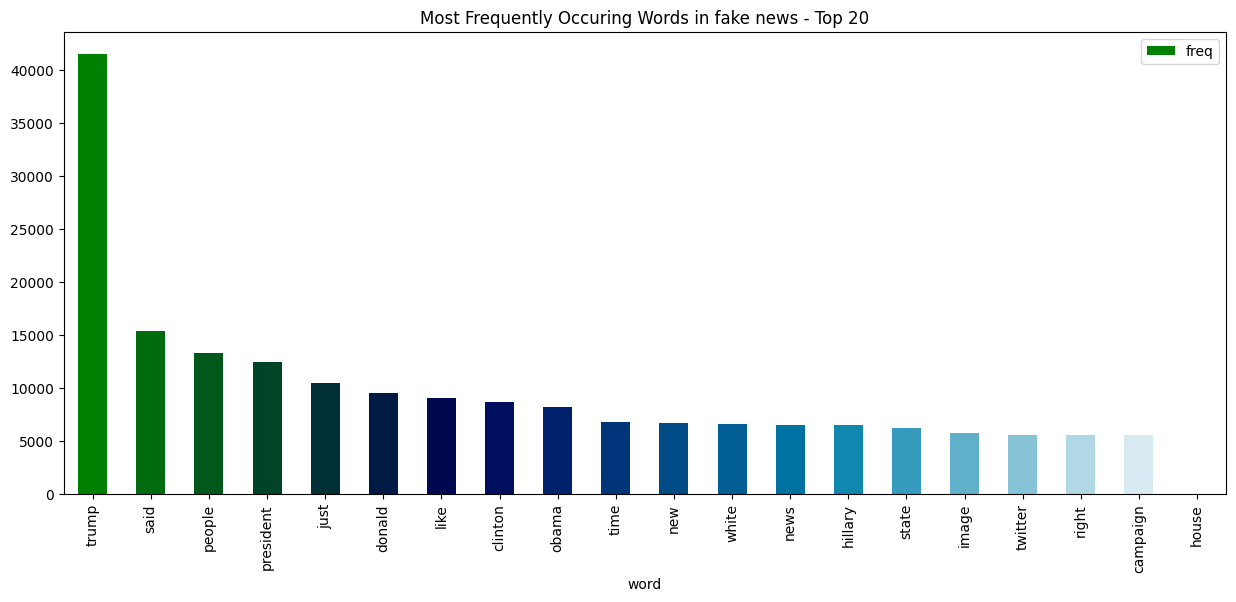

In [24]:
# Get distribution of unique words in each fake news

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_df.loc[dataset_df["label"] == 0]["text"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words in fake news - Top 20")
plt.show()

['said', 'trump', 'reuters', 'president', 'state', 'government', 'new', 'house', 'states', 'republican']


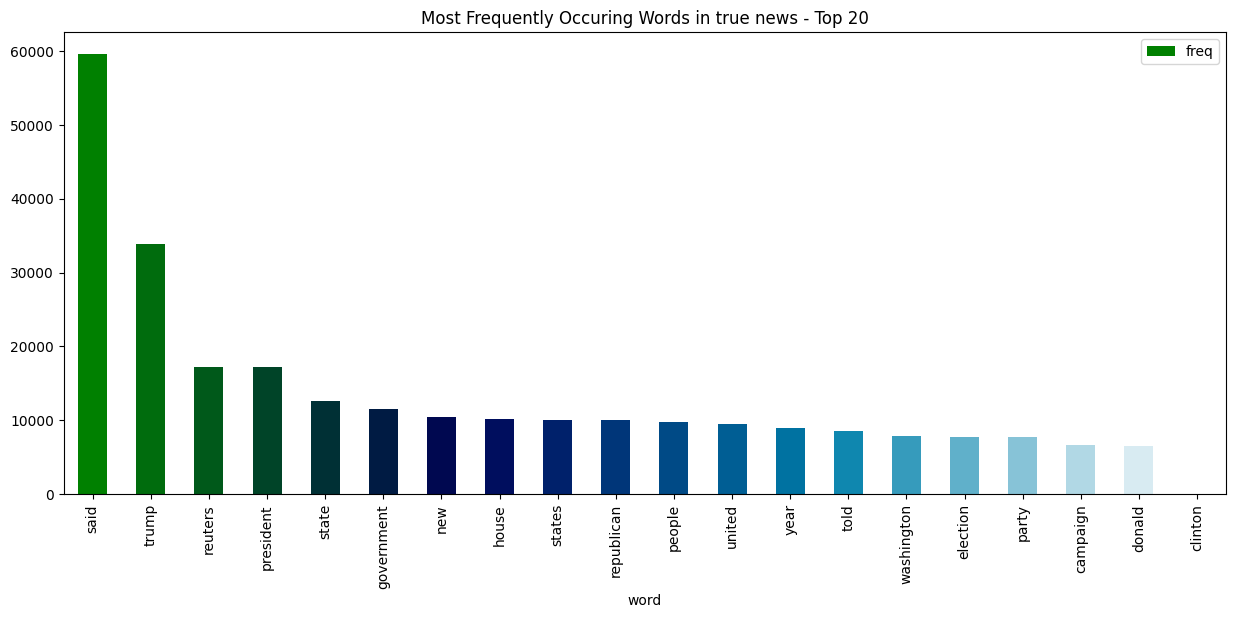

In [25]:
# Get distribution of unique words in true news

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_df.loc[dataset_df["label"] == 1]["text"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])
print(list(frequency.head(10).word.values))


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words in true news - Top 20")
plt.show()

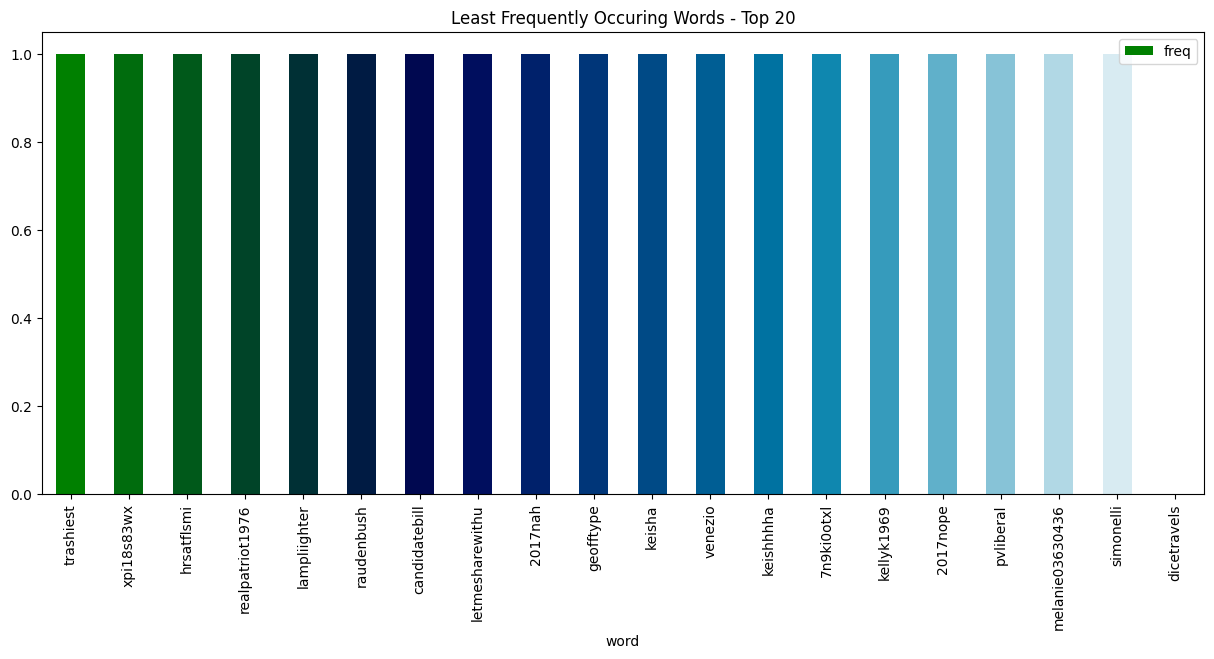

In [26]:
cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_df["text"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=False)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

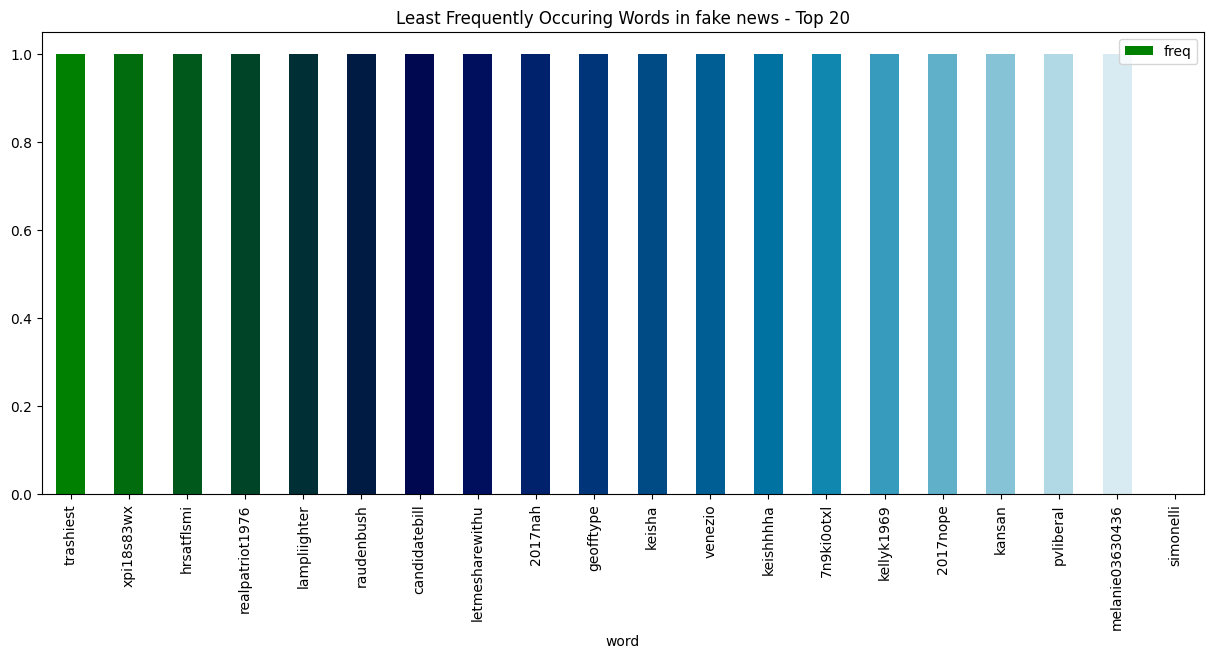

In [27]:
cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_df.loc[dataset_df["label"] == 0]["text"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=False)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words in fake news - Top 20")
plt.show()

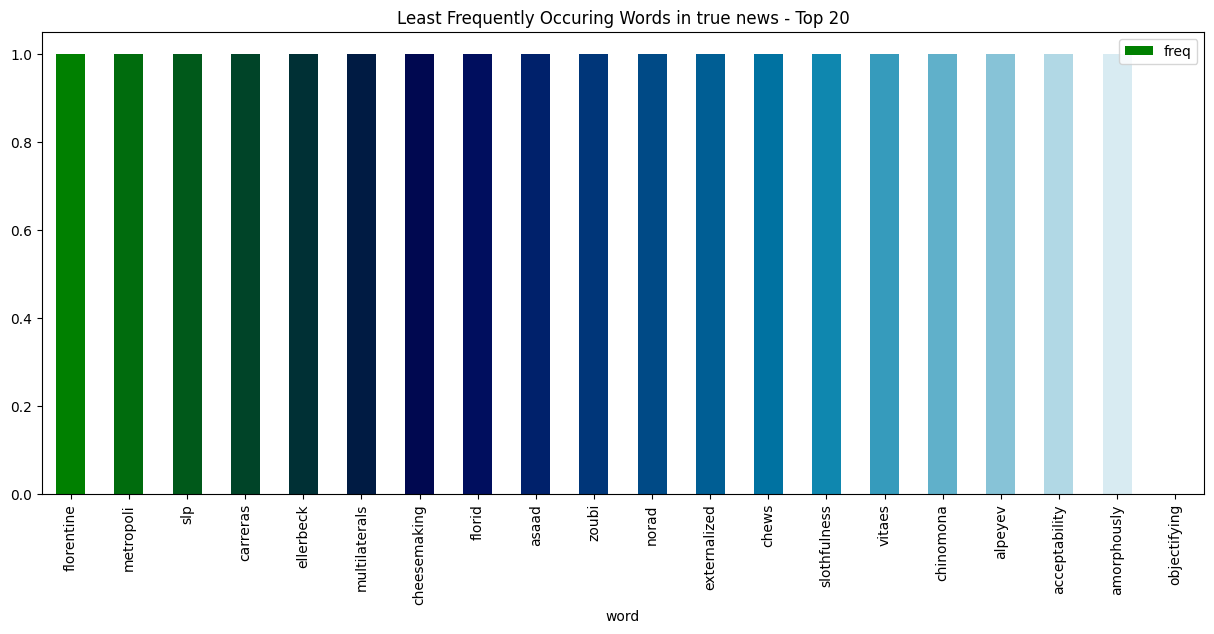

In [28]:
# Get distribution of unique words in each positive review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_df.loc[dataset_df["label"] == 1]["text"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=False)
frequency = pd.DataFrame(words_freq, columns=["word", "freq"])


color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words in true news - Top 20")
plt.show()

In [29]:
from nltk.util import ngrams
import collections
import nltk

text = str(dataset_df["text"])
tokenized = text.split()

bigrams = ngrams(tokenized, 3)
bigrams_freq = collections.Counter(bigrams)
bigrams_freq.most_common(20)

[(('one', 'of', 'the'), 2),
 (('0', 'Maury', 'is'), 1),
 (('Maury', 'is', 'perhaps'), 1),
 (('is', 'perhaps', 'one'), 1),
 (('perhaps', 'one', 'of'), 1),
 (('of', 'the', 'trashiest'), 1),
 (('the', 'trashiest', 'shows'), 1),
 (('trashiest', 'shows', 'on...'), 1),
 (('shows', 'on...', '1'), 1),
 (('on...', '1', 'Yesterday,'), 1),
 (('1', 'Yesterday,', 'after'), 1),
 (('Yesterday,', 'after', 'the'), 1),
 (('after', 'the', 'father'), 1),
 (('the', 'father', 'of'), 1),
 (('father', 'of', 'one'), 1),
 (('of', 'one', 'of'), 1),
 (('of', 'the', 'UCLA...'), 1),
 (('the', 'UCLA...', '2'), 1),
 (('UCLA...', '2', 'MOSCOW'), 1),
 (('2', 'MOSCOW', '(Reuters)'), 1)]

(-0.5, 399.5, 199.5, -0.5)

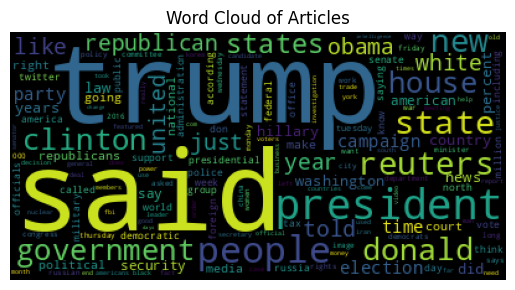

In [33]:
# Get distribution of unique words in each review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_df["text"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wordcloud = WordCloud().generate_from_frequencies(dict(words_freq))

plt.imshow(wordcloud)
plt.title("Word Cloud of Articles")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

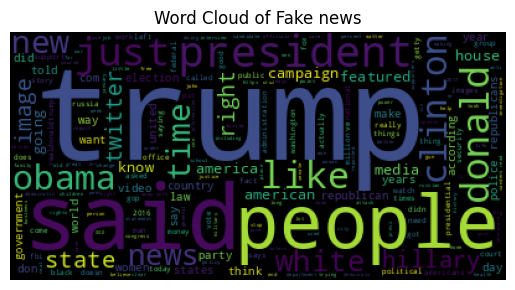

In [34]:
# Get distribution of unique words in each review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_df.loc[dataset_df["label"] == 0]["text"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wordcloud = WordCloud().generate_from_frequencies(dict(words_freq))

plt.imshow(wordcloud)
plt.title("Word Cloud of Fake news")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

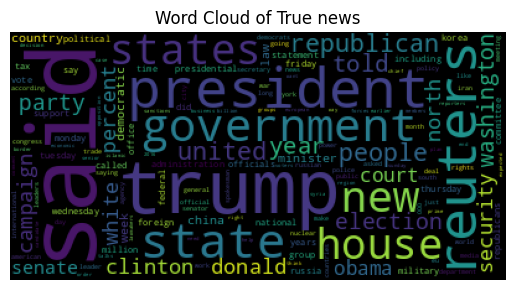

In [35]:
# Get distribution of unique words in each review

cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(dataset_df.loc[dataset_df["label"] == 1]["text"])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wordcloud = WordCloud().generate_from_frequencies(dict(words_freq))

plt.imshow(wordcloud)
plt.title("Word Cloud of True news")
plt.axis("off")